In [1]:
import pandas as pd
import numpy as np

## Define the problem:
Mempertahankan konsumen jauh lebih sulit daripada mendapatkan konsumen yang baru. Berdasarkan hasil studi yang dicantumkan di dalam Harvard Business Review, meningkatkan customer retention rate sebesar 5% bisa meningkatkan profit sebanyak 25% sampai 95%. Ini merupakan perubahan dengan angka yang signifikan!

Customer retention biasanya memerlukan biaya marketing yang lebih sedikit jika dibandingkan dengan strategi acquisition. Di samping itu, customer yang berhasil dipertahankan akan dengan senang hati merekomendasikan produk Anda kepada orang-orang lain. Tidak hanya itu saja, para customer tersebut pada umumnya juga memiliki lifetime value yang lebih tinggi daripada customer yang didapat melalui channel konvensional.

Pada challenge kali ini kita akan mencoba untuk menganalisa penyebab dari customer churn dan memprediksi customer churn rate pada Telco company.

## Asking the Question
1. Bagaimana perilaku telecom customer yang melakukan churn?
2. Bagaimana hasil prediksi dari churn rate?
3. Bagaimana korelasi variabel churn dengan variabel lainnya?

## Data Gathering
Data didapatkan dari situ kaggle yang dapat diakses dengan klik link <a href="https://www.kaggle.com/blastchar/telco-customer-churn">berikut</a>

## Reading the Data

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

## Data Cleaning

In [4]:
#apakah ada duplikat data?
data.duplicated().sum()

0

In [5]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
#cek tipe data tiap kolom
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#kolom total charge seharusnya merupakan tipe data numerik, bukan objek. Selanjutnya kita ubah tipe data dari kolom tsb.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#terdapat 11 nilai kosong pada kolom TotalCharge, mari kita drop nilai tersebut
data.dropna(inplace = True)

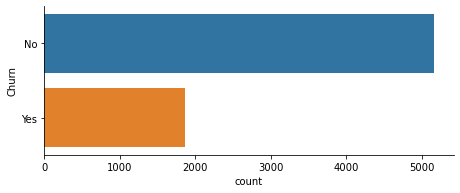

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.catplot(y="Churn", kind="count", data=data, height=2.6, aspect=2.5, orient='h')

In [24]:
#Remove customer IDs from the data set
df2 = data.iloc[:,1:]
#Mengubah variabel dependan ke dalam bentuk biner 0 atau 1
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
#Mengubah kategorikal variabel menjadi dummy variabel
df_dummies = pd.get_dummies(df2)
df_dummies.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

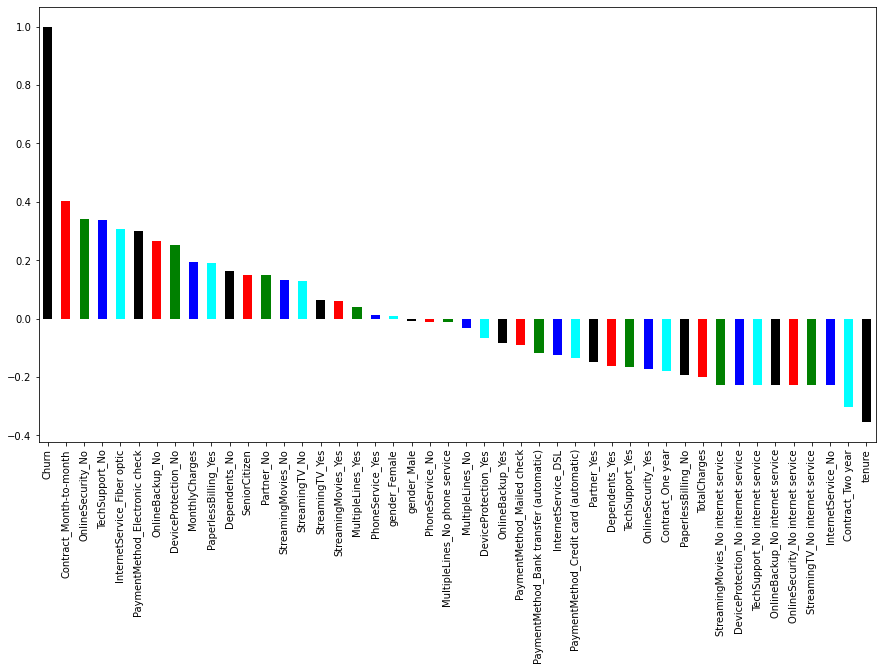

In [23]:
#Bagaimana korelasi variabel churn dengan yang lain?
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

Terlihat dari data korelasi terhadap variabel churn diatas, variabel month-to-month contract, online security dan tech support memiliki angka korelasi positif. Sedangkan variabel tenure, two_year contract terlihat memiliki korelasi negatif.

Yang menarik adalah layanan seperti Online security, streaming TV, online backup, tech support (Yes), dll. dengan tidak langganan internet memiliki korelasi yang negatif dengan variabel churn.

## Exploratory Data Analysis

<b>A) Demographic</b> - Dimulai dari memahami variabel gender, age range, partner dan dependant status dari customer

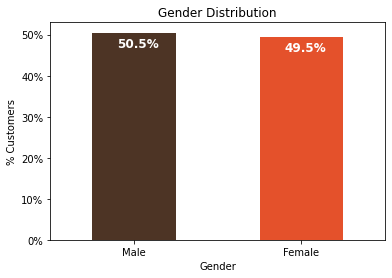

In [27]:
import matplotlib.ticker as mtick
#Gender Distribution
colors = ['#4D3425','#E4512B']
ax = (data['gender'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Dari hasil visualisasi gender distribution, terlihat bahwa setengah dari jumlah pelanggan adalah laki-laki.

Text(0.5, 1.0, '% of Senior Citizens')

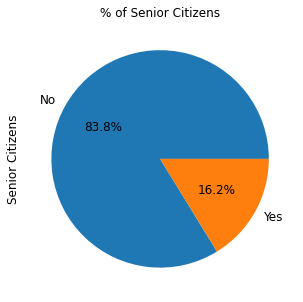

In [28]:
#Senior Citizen
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Terdapat 16% saja yang merupakan "Senior Citizen" dari jumlah pelanggan keseluruhan

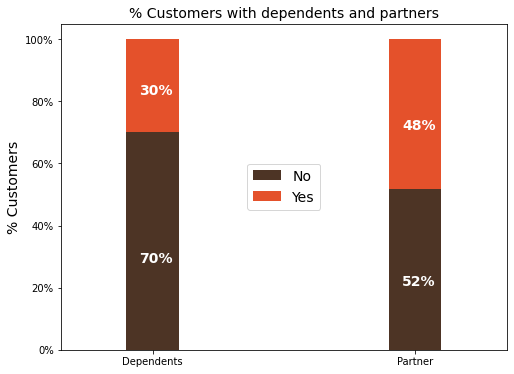

In [30]:
#Status variabel partner dan dependant
df2 = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(data)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Sekitar 30% pelanggan yang ketergantungan, dan sekitar 48% dari total pelanggan memiliki partner

Bagaimana pelanggan yang memiliki ketergantungan dan juga partner? 

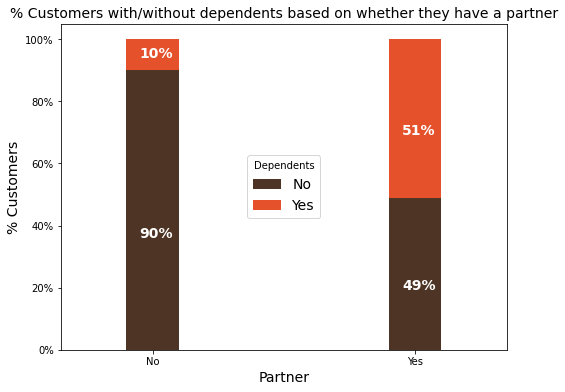

In [32]:
colors = ['#4D3425','#E4512B']
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Dari hasil visualisasi tersebut, kita bisa melihat bahwa pelanggan yang memiliki partner ternyata memiliki ketergantungan sekitar 51%

#### B) Customer Account Information
Tenure (masa jabatan) dan Contract

Text(0.5, 1.0, '# of Customers by their tenure')

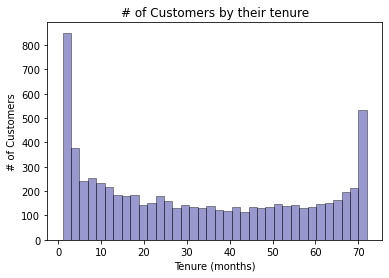

In [35]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Kita bisa lihat visualisasi diatas, bahwa pelanggan hanya bertahan selama beberapa bulan saja

Text(0.5, 1.0, '# of Customers by Contract Type')

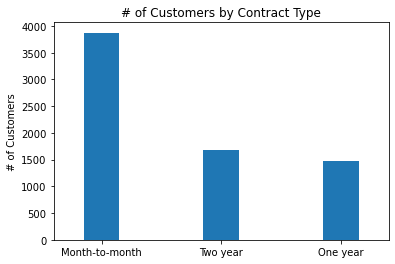

In [50]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

#### Memahami tenor dengan tipe kontraknya

Text(0.5, 1.0, 'Two Year Contract')

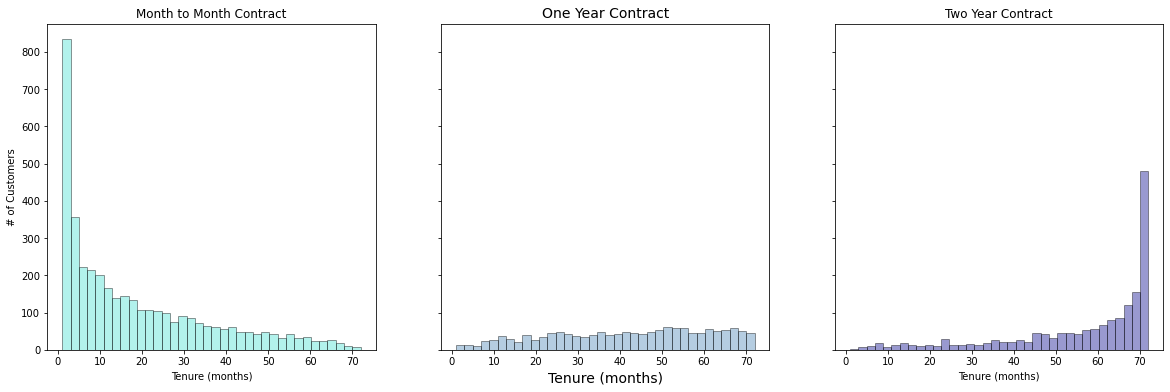

In [54]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

### C) Bagaimana distribusi berbagai jenis layanan dengan pelangannya?

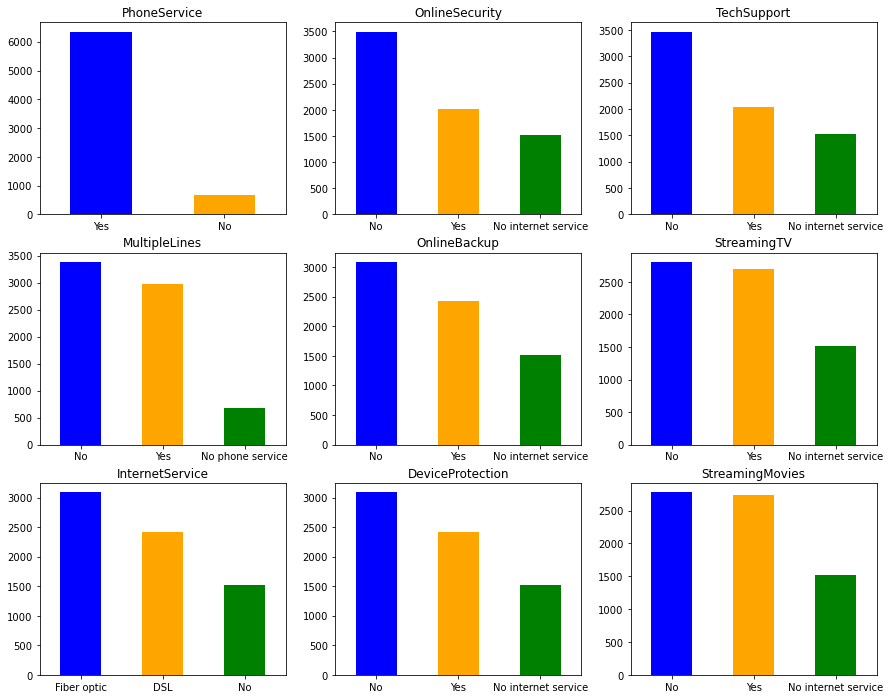

In [57]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color=['blue','orange','green'])
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color=['blue','orange','green'])
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color=['blue','orange','green'])
    ax.set_title(item)

#### D) Mari kita lihat hubungan atau interaksi variabel dependant atau predictor (Churn) dengan variabel penting lainnya

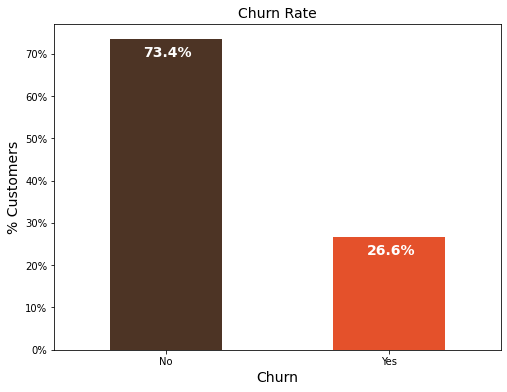

In [59]:
#Churn Rate
colors = ['#4D3425','#E4512B']
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

Dari visualisasi data Churn Rate diatas, kita bisa lihat bahwa 73.4% dari total pelanggan tidak melakukan pembatalan langganannya (Churn). Data jauh lebih condong kearah pelanggan yang tetap terus berlangganan (Churn = No).

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

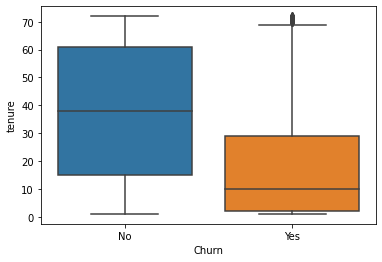

In [61]:
#Churn vs Tenor
sns.boxplot(x = data.Churn, y = data.tenure)

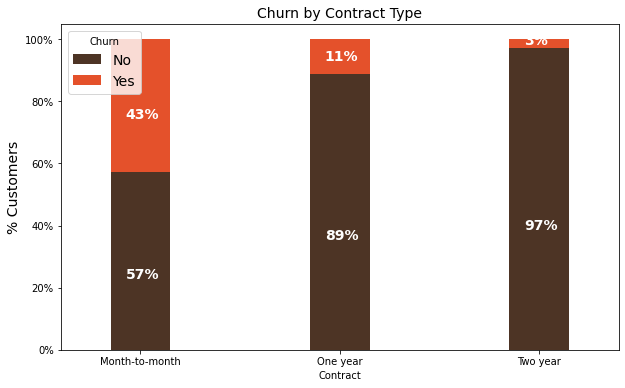

In [63]:
#Churn sesuai dengan Tipe Kontrak
colors = ['#4D3425','#E4512B']
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Sesuai dengan yang kita lihat pada data korelasi diatas, pelanggan yang tipe kontraknya adalah month-to-month memiliki kecenderungan untuk tidak meneruskan langganan (Churn = Yes) sekitar 43%, dibandingkan dengan tipe kontrak yang lain.

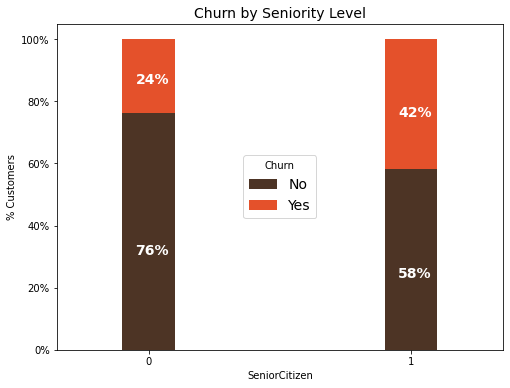

In [65]:
#Churn by Seniority
colors = ['#4D3425','#E4512B']
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Ternyata faktor usia atau tingkat senioritas memiliki hubungan yang kuat terhadap variabel Churn. Terlihat bahwa SeniorCitizen memiliki kecenderungan untuk berhenti berlangganan (Churn = Yes) sekitar 42%.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

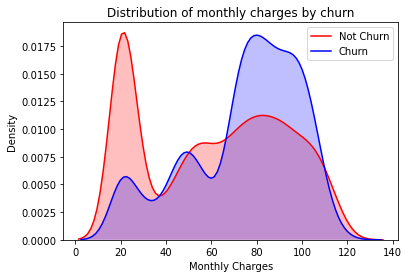

In [68]:
#Churn by Monthly Charges
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Faktor biaya bulanan pun mempunyai korelasi yang kuat terhadap variabel churn. Dapat kita lihat pada figur diatas, ada kecenderungan bahwa pelanggan berhenti berlangganan ketika biaya bulanannya tinggi.

Text(0.5, 1.0, 'Distribution of total charges by churn')

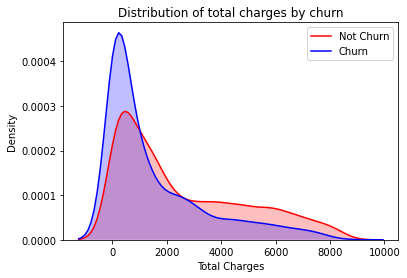

In [71]:
#Churn by Total Charge
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

Sedangkan untuk total churn, pelanggan berhenti berlangganan saat biaya keseluruhan lebih kecil.

# Building Predictive Model

## Logistic Regression

In [73]:
#Logistic Regression
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [74]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [75]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


AxesSubplot(0.125,0.125;0.775x0.755)


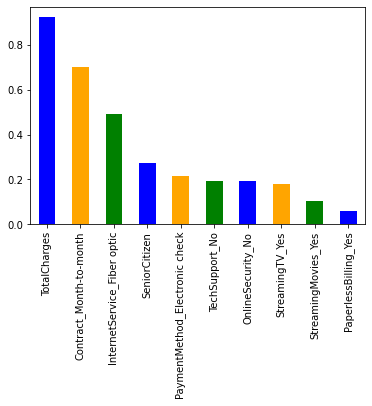

In [79]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar',color=['blue','orange','green']))

AxesSubplot(0.125,0.125;0.775x0.755)


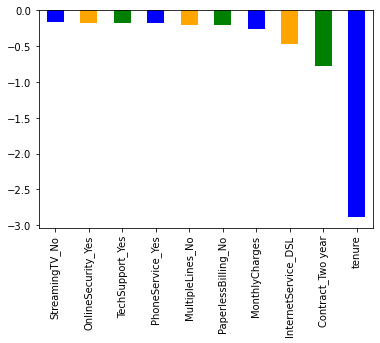

In [81]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar',color=['blue','orange','green']))

Kesimpulan hasil prediksi dengan menggunakan logistic regression
1. Terdapat relasi negatif atau positif terhadap variabel prediksi (Churn). Relasi negatif berarti tingkat Churn berkurang.
2. Sesuai dengan bagian EDA, mempunyai kontrak total 2 Tahun (Contract_Two_Year) dengan variabel tenor, angka churn cenderung rendah. Terbukti kedua variabel tersebut merupakan variabel dengan korelasi ter-negatif dari variabel yang lain.
3. Memiliki layanan Internet DL juga mengurangi jumlah churn
4. Terakhir, Variabel Total Charge, Month-to-Month (Kontrak Bulanan), dan layanan internet fiber-optic dapat menyebabkan pelanggan untuk berhenti berlangganan (Churn). Ini menarik, karena internet fiber optik itu lebih cepat namun angka pelanggan untuk berhenti berlangganan tinggi karenanya.

## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


<AxesSubplot:>

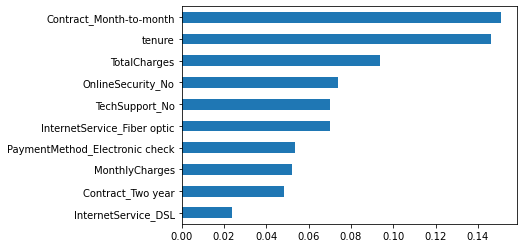

In [84]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')